In [10]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('../data/train.csv')

In [86]:
train.head()
train.dropna(inplace=True)

In [87]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [89]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


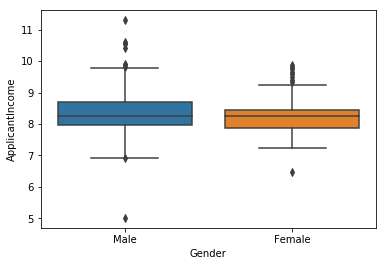

In [90]:
ApplicantIncome_log = np.log(train['ApplicantIncome'])
sb.boxplot(x = "Gender", y=ApplicantIncome_log, data=train)

In [31]:
for column in train:
    print(column, train[column].unique())

Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

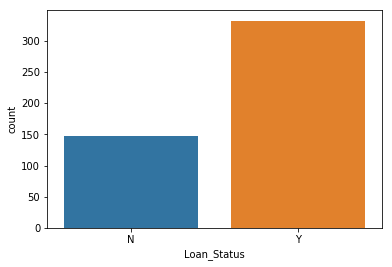

In [91]:
sb.countplot(train['Loan_Status'])

In [37]:
train.groupby(by="Married").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,,,,,
No,4970.384977,1316.558685,128.883495,351.115385,0.839196
Yes,5629.173367,1794.632965,155.750000,336.987147,0.842541


In [38]:
train.groupby(by="Education").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Education,,,,,
Graduate,5857.433333,1717.474833,154.060215,344.669492,0.857788
Not Graduate,3777.283582,1276.544776,118.409449,332.156250,0.785124


In [41]:
train.groupby(by="Self_Employed").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,,,,,
No,5049.748000,1580.989840,141.748963,343.263804,0.835853
Yes,7380.817073,1501.341463,172.000000,336.300000,0.840000


In [42]:
train.groupby(by="Credit_History").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,
0.0,5679.438202,1542.179775,146.717647,341.927711
1.0,5426.526316,1528.250358,144.786026,342.192719


In [44]:
train.groupby(by="Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [179]:
cat_vars = ['Gender', 'Married', "Dependents", 'Self_Employed', 'Education', 'Property_Area', 'Loan_Status']
num_vars = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
df_dummies = pd.get_dummies(train[cat_vars], drop_first=True)
df_dummies

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,1,1
3,1,1,0,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,0,1,1
5,1,1,0,1,0,1,0,0,1,1
6,1,1,0,0,0,0,1,0,1,1
7,1,1,0,0,1,0,0,1,0,0
8,1,1,0,1,0,0,0,0,1,1
9,1,1,1,0,0,0,0,1,0,0
10,1,1,0,1,0,0,0,0,1,1


In [126]:
train[num_vars].shape

(480, 5)

In [180]:
data = pd.concat([train[num_vars], df_dummies], axis=1, sort=False)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,0,0,1,1


In [187]:
Y = data['Loan_Status_Y']
X = data.loc[:,:'Property_Area_Urban'])
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,1,1,0,0,0,0,1,0,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,1,0,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0
10,3200,700.0,70.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [170]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [206]:
logreg = LogisticRegression()
rfe = RFE(logreg, 6)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)
list(X.columns.values[rfe.support_])

[False False False False  True False  True  True  True False False  True
  True False]
[9 8 6 7 1 3 1 1 1 5 2 1 1 4]


['Credit_History',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Property_Area_Semiurban']

In [188]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Loan_Status_Y   No. Observations:                  480
Model:                          Logit   Df Residuals:                      466
Method:                           MLE   Df Model:                           13
Date:                Tue, 31 Jul 2018   Pseudo R-squ.:                     inf
Time:                        14:36:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ApplicantIncome          1.411e-06   2.84e-05      0.050      0.960   -5.42e-05     5.7

C:\Users\tommy\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\tommy\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\tommy\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [210]:
y_pred = model.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78
